<a href="https://colab.research.google.com/github/plaban1981/Hands_on_unsupervised_learning/blob/master/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

'''Data Prep'''
from sklearn import preprocessing as pp 
from scipy.stats import pearsonr 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss 
from sklearn.metrics import precision_recall_curve, average_precision_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score,accuracy_score
from sklearn.metrics import confusion_matrix, classification_report 

'''Algos'''
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

## Load Data - Credit Card Fraud

In [3]:

df = pd.read_csv('https://media.githubusercontent.com/media/aapatel09/handson-unsupervised-learning/master/datasets/credit_card_data/credit_card.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


##Check for null values

In [4]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

## Data Statistics

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


##Correlation with output label

In [0]:
corr = df[df.columns[1:]].corr()['Class'][:].to_dict()

In [7]:
sorted(corr.items(), key=lambda x:np.abs(x[1]),reverse = True)

[('Class', 1.0),
 ('V17', -0.32648106724269765),
 ('V14', -0.30254369580346246),
 ('V12', -0.2605929248764044),
 ('V10', -0.21688294364035493),
 ('V16', -0.1965389403034051),
 ('V3', -0.19296082706681578),
 ('V7', -0.1872565915137108),
 ('V11', 0.15487564474346413),
 ('V4', 0.1334474862385853),
 ('V18', -0.11148525388869356),
 ('V1', -0.10134729859476972),
 ('V9', -0.09773268607377422),
 ('V5', -0.09497429899115034),
 ('V2', 0.09128865034433538),
 ('V6', -0.04364316069982903),
 ('V21', 0.0404133806104527),
 ('V19', 0.03478301303640623),
 ('V20', 0.020090324196912198),
 ('V8', 0.01987512391473314),
 ('V27', 0.017579728189458178),
 ('V28', 0.009536040916206127),
 ('V24', -0.0072209067159303),
 ('Amount', 0.0056317530067495365),
 ('V13', -0.004569778799447076),
 ('V26', 0.004455397501269385),
 ('V15', -0.004223402267843587),
 ('V25', 0.0033077055972894065),
 ('V23', -0.002685155740242337),
 ('V22', 0.0008053175052959154)]

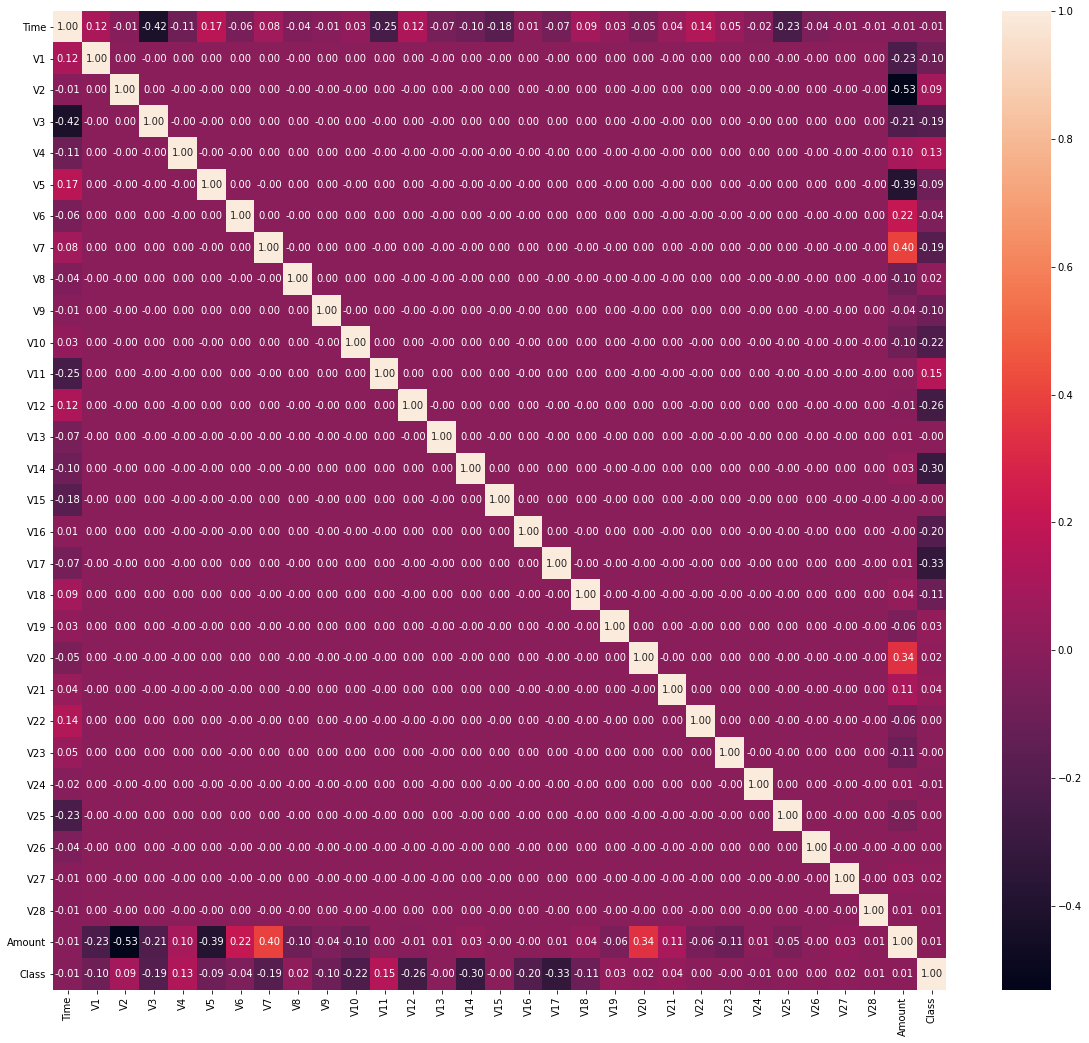

In [8]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),annot=True,fmt=".2f")

In [9]:
df.shape

(284807, 31)

here feature selection is not necessary as the number of observations (284807)vastly outnumbers the number of observations(30 fatures)

# Class Frequency Distribution

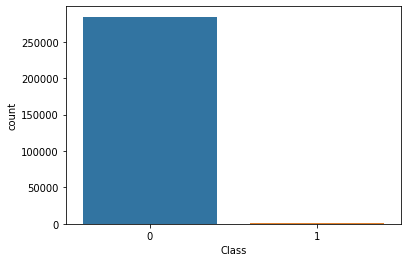

In [10]:
sns.countplot(x='Class',data=df)

The dataset is imbalanced

# Model Preparation

*Generate feature matrix and labels array*

In [0]:

X = df.copy().drop(['Class'],axis=1)
Y = df['Class'].copy()

*Train Test Split*

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,random_state=2018, stratify=Y)#startified split

In [13]:
print(f'train calss ratio :{y_train.sum()/len(y_train)}')
print(f'test calss ratio :{y_test.sum()/len(y_test)}')

train calss ratio :0.0017293784718582959
test calss ratio :0.0017236426314277506


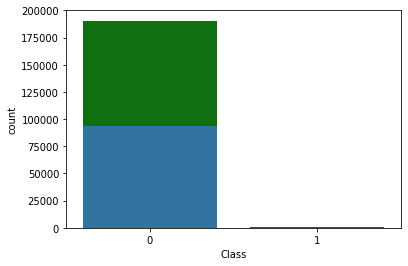

In [14]:
sns.countplot(y_train,color='green')
sns.countplot(y_test)

*Cross Validation*

In [0]:
k_fold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2018)

# Logistic Regression

*Handling Imbalance Data :*

*By default, the errors for each class may be considered to have the same weighting, say 1.0. These weightings can be adjusted based on the importance of each class.*

**minimize sum i to n -(w0 * log(yhat_i) * y_i + w1 * log(1 – yhat_i) * (1 – y_i))**


*The weighting is applied to the loss so that smaller weight values result in a smaller error value, and in turn, less update to the model coefficients. A larger weight value results in a larger error calculation, and in turn, more update to the model coefficients.*

* Small Weight: Less importance, less update to the model coefficients.
* Large Weight: More importance, more update to the model coefficients. 


As such, the modified version of logistic regression is referred to as **Weighted Logistic Regression, Class-Weighted Logistic Regression or Cost-Sensitive Logistic Regression**.

The weightings are sometimes referred to as importance weightings.

Although straightforward to implement, the challenge of weighted logistic regression is the choice of the weighting to use for each class. italicized text 

https://machinelearningmastery.com/cost-sensitive-logistic-regression/

# Weighted Logistic Regression with Scikit-Learn


The scikit-learn Python machine learning library provides an implementation of logistic regression that supports class weighting.

The LogisticRegression class provides the class_weight argument that can be specified as a model hyperparameter. The class_weight is a dictionary that defines each class label (e.g. 0 and 1) and the weighting to apply in the calculation of the negative log likelihood when fitting the model.

The class weighing can be defined multiple ways; for example:

* Domain expertise, determined by talking to subject matter experts.
* Tuning, determined by a hyperparameter search such as a grid search.
* Heuristic, specified using a general best practice.


#### A best practice for using the class weighting is to use the inverse of the class distribution present in the training dataset.

*ratio of minority class to majority class in train and test dataset*

In [18]:
y_train[y_train== 1].count() / y_train[y_train == 0].count()

0.001732374402855793

In [19]:
y_test[y_test== 1].count() / y_test[y_test == 0].count()

0.0017266187050359713

In [0]:
penalty = 'l2'
C = 1.0
class_weight = {0:0.45,1:1}
random_state = 2018
solver = 'liblinear'
n_jobs = 1

logReg = LogisticRegression(penalty=penalty, C=C, 
            class_weight=class_weight, random_state=random_state, 
                            solver=solver, n_jobs=n_jobs)

In [37]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])

model = logReg
i = 0
for train_index, cv_index in k_fold.split(X_train,y_train.ravel()):
    i +=1
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:],X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index],y_train.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold,model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    trainCV = accuracy_score(y_train_fold, model.predict(X_train_fold))

    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = model.predict_proba(X_cv_fold)  
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    accCV = accuracy_score(y_cv_fold, model.predict(X_cv_fold))
    cvScores.append(loglossCV)
    
    print("K Fold :",i)
    print('*'* 80)
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    print('\n')
    print('Training Accuracy: ', trainCV)
    print('CV Accuracy: ', accCV)
    print('\n')
    
loglossLogisticRegression = log_loss(y_train, predictionsBasedOnKFolds.loc[:,1])
print('Logistic Regression Log Loss: ', loglossLogisticRegression)


K Fold : 1
********************************************************************************
Training Log Loss:  0.009073467777345233
CV Log Loss:  0.008887568216693679


Training Accuracy:  0.999187716172309
CV Accuracy:  0.999187716172309


K Fold : 2
********************************************************************************
Training Log Loss:  0.005302520742668714
CV Log Loss:  0.004910103356603367


Training Accuracy:  0.9992794256367257
CV Accuracy:  0.9991353107640708


K Fold : 3
********************************************************************************
Training Log Loss:  0.004652504023920608
CV Log Loss:  0.004789419542937401


Training Accuracy:  0.9993252803689341
CV Accuracy:  0.9992925269887852


K Fold : 4
********************************************************************************
Training Log Loss:  0.004787014336114507
CV Log Loss:  0.004694806065866143


Training Accuracy:  0.9993449323970234
CV Accuracy:  0.9993711351011424


K Fold : 5
***************

# ROC Curve

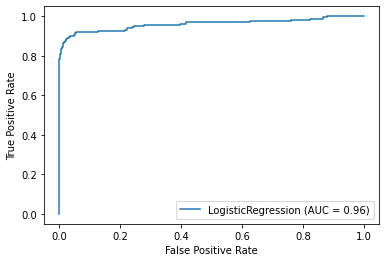

In [38]:
from sklearn.metrics import plot_roc_curve,plot_confusion_matrix
plot_roc_curve(logReg,X_test,y_test)

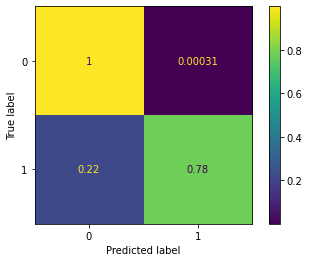

In [41]:
plot_confusion_matrix(logReg,X_test,y_test,normalize='true')

In [42]:
from sklearn.metrics import f1_score
f1_score(y_test,logReg.predict(X_test))

0.7949526813880126

*with weight = 'balanced'*

In [35]:
penalty = 'l2'
C = 1.0
class_weight = 'balanced'
random_state = 2018
solver = 'liblinear'
n_jobs = 1

logReg = LogisticRegression(penalty=penalty, C=C, 
            class_weight=class_weight, random_state=random_state, 
                            solver=solver, n_jobs=n_jobs)



model = logReg
i = 0
for train_index, cv_index in k_fold.split(X_train,y_train.ravel()):
    i +=1
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:],X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index],y_train.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold,model.predict_proba(X_train_fold)[:,1])
    #trainingScores.append(loglossTraining)
    trainCV = accuracy_score(y_train_fold, model.predict(X_train_fold))

    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = model.predict_proba(X_cv_fold)  
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    accCV = accuracy_score(y_cv_fold, model.predict(X_cv_fold))
    #cvScores.append(loglossCV)
    
    print("K Fold :",i)
    print('*'* 80)
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    print('\n')
    print('Training Accuracy: ', trainCV)
    print('CV Accuracy: ', accCV)
    print('\n')
    


K Fold : 1
********************************************************************************
Training Log Loss:  0.10943413732968182
CV Log Loss:  0.10858633973025444


Training Accuracy:  0.97897888062048
CV Accuracy:  0.9783041609894141


K Fold : 2
********************************************************************************
Training Log Loss:  0.10452743402765072
CV Log Loss:  0.10398720620602298


Training Accuracy:  0.9734370086992977
CV Accuracy:  0.9730636201656011


K Fold : 3
********************************************************************************
Training Log Loss:  0.11558192793972848
CV Log Loss:  0.11799027363286076


Training Accuracy:  0.9745702756524474
CV Accuracy:  0.9755266743527932


K Fold : 4
********************************************************************************
Training Log Loss:  0.11576325315426426
CV Log Loss:  0.11834814977244154


Training Accuracy:  0.9748912587779058
CV Accuracy:  0.9747929986374594


K Fold : 5
***********************